Disable warnings

In [53]:
import warnings
warnings.filterwarnings('ignore')
from rdkit import rdBase
rdBase.DisableLog('rdApp.error')

Import modules

In [132]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Load model

In [55]:
vae = VAEUtils(directory='../models/zinc_properties')

Using standarized functions? True
Standarization: estimating mu and std values ...done!


Molecules to manipulate with

In [56]:
molecules = ['Cc1ccc(S2(=O)=NC(=O)Nc3ccccc32)cc1',
    'CN(Cc1ccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C',
    'COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1']

Functions for printing required information

In [140]:
'''
    Show SMILE and evaluate properties
    Argumetns:
        molecule -- molecule SMILE
        z -- molecule encoded vector
    Returns: None
'''
def print_basic_info(molecule, z):
    properties = vae.predict_prop_Z(z)[0]
    print('{:12s}: '.format('Molecule') + molecule)
    print('{:12s}'.format('Properties'))
    for prop_name, prop_value in zip(['qed', 'SAS', 'logP'], properties):
        print('\t{:4s}: {}'.format(prop_name, prop_value))
     
'''
    Show molecule info and decoded molecule with one attempt
    Argumetns:
        molecule -- molecule SMILE
    Returns: None
'''
def single_decode(molecule):
    x_orig_hot = vae.smiles_to_hot(molecule, canonize_smiles=True)
    z = vae.encode(x_orig_hot)
    print_basic_info(molecule, z)
    x_decoded = vae.hot_to_smiles(vae.decode(z), strip=True)[0]
    print('{:12s}: {}'.format('Decoded', x_decoded))
    print() 

'''
    Show molecule info and decoded molecules with multiple attempts
    Argumetns:
        molecule -- molecule SMILE
        attempts -- number of attempts to decode
        noise -- noise for decoding
    Returns: None
'''
def multiple_decode(molecule, attempts=100, noise=3.0):
    x_orig_hot = vae.smiles_to_hot(molecule, canonize_smiles=True)
    z = vae.encode(x_orig_hot)
    print_basic_info(molecule, z)
    df = vae.z_to_smiles(z, decode_attempts=attempts, noise_norm=noise)
    print('{:12s}:'.format('Decoded'))
    display(PandasTools.FrameToGridImage(df, column='mol', legendsCol='smiles', molsPerRow=3))
    print(df.drop('mol', 1))
    print()

Single decoding

In [141]:
for molecule in molecules:
    single_decode(molecule)

Molecule    : Cc1ccc(S2(=O)=NC(=O)Nc3ccccc32)cc1
Properties  
	qed : 0.7231325507164001
	SAS : 2.410372495651245
	logP: 3.1467232704162598
Decoded     : CO1ccc(C[N+]2=NC(=O)Nc3ccccc32)cc1

Molecule    : CN(Cc1ccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C
Properties  
	qed : 0.8115883469581604
	SAS : 2.219855308532715
	logP: 2.4382762908935547
Decoded     : CN(C)cccc2c(c1)C(=O)C)C)C(=O)OC(C)(C)C

Molecule    : COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1
Properties  
	qed : 0.7531524896621704
	SAS : 2.4784982204437256
	logP: 0.0503462553024292
Decoded     : COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1



Multiple decoding

Molecule    : Cc1ccc(S2(=O)=NC(=O)Nc3ccccc32)cc1
Properties  
	qed : 0.7231325507164001
	SAS : 2.410372495651245
	logP: 3.1467232704162598
Decoded     :


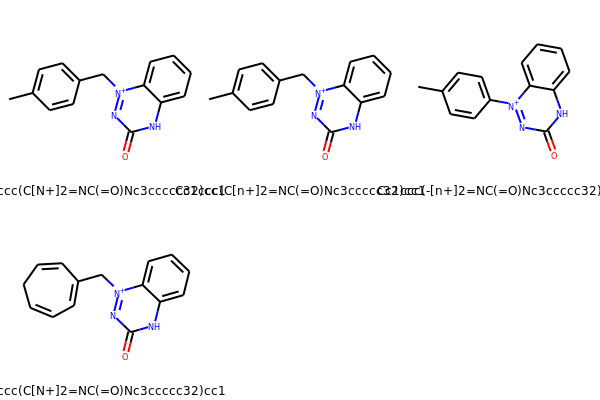

                               smiles   distance  count  frequency
0  Cc1ccc(C[N+]2=NC(=O)Nc3ccccc32)cc1  10.722446      7   0.538462
1  Cc1ccc(C[n+]2=NC(=O)Nc3ccccc32)cc1  10.722446      4   0.307692
2  Cc1ccc(-[n+]2=NC(=O)Nc3ccccc32)cc1  10.806656      1   0.076923
3  C1cccc(C[N+]2=NC(=O)Nc3ccccc32)cc1  16.270990      1   0.076923

Molecule    : CN(Cc1ccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C
Properties  
	qed : 0.8115883469581604
	SAS : 2.219855308532715
	logP: 2.4382762908935547
Decoded     :


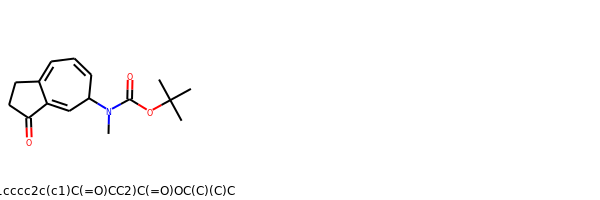

                                   smiles   distance  count  frequency
0  CN(C1cccc2c(c1)C(=O)CC2)C(=O)OC(C)(C)C  18.270587      2        1.0

Molecule    : COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1
Properties  
	qed : 0.7531524896621704
	SAS : 2.4784982204437256
	logP: 0.0503462553024292
Decoded     :


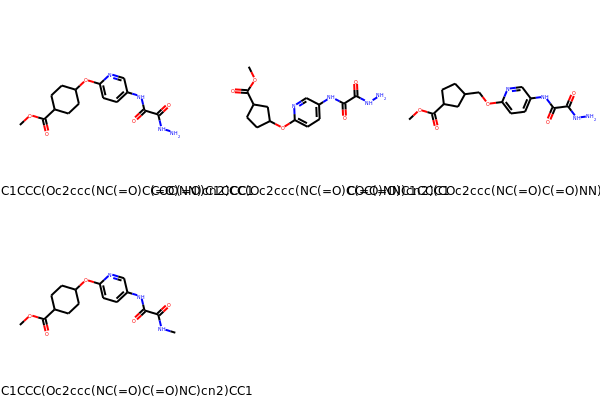

                                      smiles   distance  count  frequency
0  COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)CC1   0.000007     47   0.770492
1   COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NN)cn2)C1   3.332406      2   0.032787
2  COC(=O)C1CC(COc2ccc(NC(=O)C(=O)NN)cn2)CC1   8.881629      1   0.016393
3  COC(=O)C1CCC(Oc2ccc(NC(=O)C(=O)NC)cn2)CC1  14.774548     11   0.180328



In [142]:
for molecule in molecules:
    multiple_decode(molecule)